Model Selection

Do the following on titanic dataset
1. Load the dataset into python environment
2. Do all the necessary pre-processing steps
3. Create kNN and SVM models
4. Do k-fold and stratified stratified k-fold cross validation techniques and find the
average accuracy score of the models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [34]:
# Load the dataset into the Python environment:
df=pd.read_csv('titanic_dataset .csv')


In [35]:

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [37]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# # Box Plots
# fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
# i = 0
# for col in df.columns:
#     axs[i].boxplot(df[col], vert=False)
#     axs[i].set_ylabel(col)
#     i+=1
# plt.show()


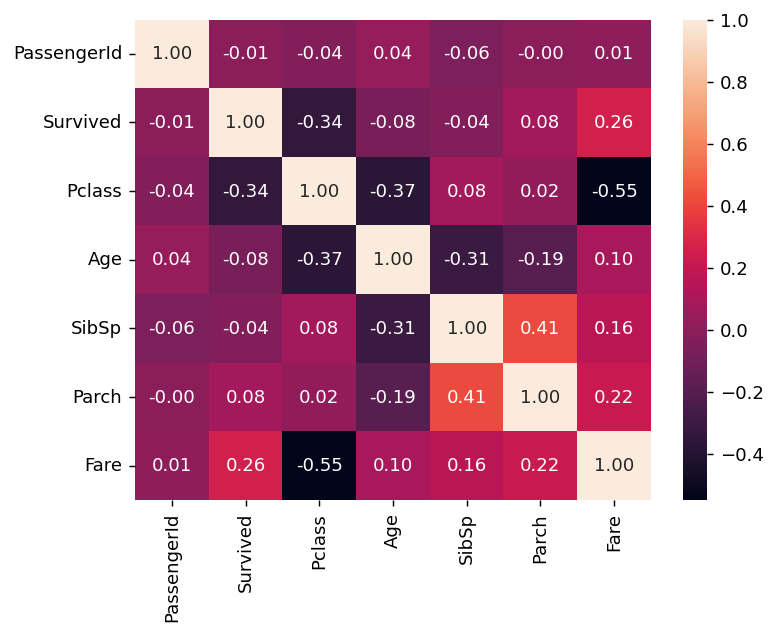

In [38]:
#correlation
corr = df.corr()

plt.figure(dpi=130)

sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()


In [42]:
# Perform the necessary pre-processing steps:
# Drop irrelevant columns
data = df.drop(["PassengerId", "Name", "Ticket", "Cabin","Fare"], axis=1)

# Handle missing values
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Convert categorical variables to numeric
# df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Split features and target variable
X = data.drop("Survived", axis=1)
y = data["Survived"]


In [43]:
# Create kNN and SVM models:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier()
svm = SVC()



In [44]:
# Perform k-fold and stratified k-fold cross-validation:



from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Define the number of folds
k = 5

# k-fold cross-validation
k_fold_scores_knn = cross_val_score(knn, X, y, cv=KFold(n_splits=k))
k_fold_scores_svm = cross_val_score(svm, X, y, cv=KFold(n_splits=k))

# Stratified k-fold cross-validation
stratified_k_fold_scores_knn = cross_val_score(knn, X, y, cv=StratifiedKFold(n_splits=k))
stratified_k_fold_scores_svm = cross_val_score(svm, X, y, cv=StratifiedKFold(n_splits=k))

# Calculate average accuracy scores
average_accuracy_knn = k_fold_scores_knn.mean()
average_accuracy_svm = k_fold_scores_svm.mean()
average_accuracy_stratified_knn = stratified_k_fold_scores_knn.mean()
average_accuracy_stratified_svm = stratified_k_fold_scores_svm.mean()

print("Average Accuracy (k-fold):")
print("kNN:", average_accuracy_knn)
print("SVM:", average_accuracy_svm)

print("\nAverage Accuracy (Stratified k-fold):")
print("kNN:", average_accuracy_stratified_knn)
print("SVM:", average_accuracy_stratified_svm)



C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Average Accuracy (k-fold):
kNN: 0.7755570899504112
SVM: 0.6385851484527023

Average Accuracy (Stratified k-fold):
kNN: 0.7699579436319126
SVM: 0.6419873203188751


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [56]:

print("Average Accuracy (k-fold):")
print("kNN:", average_accuracy_knn)
print("SVM:", average_accuracy_svm)

print("\nAverage Accuracy (Stratified k-fold):")
print("kNN:", average_accuracy_stratified_knn)
print("SVM:", average_accuracy_stratified_svm)





Average Accuracy (k-fold):
kNN: 0.7755570899504112
SVM: 0.6385851484527023

Average Accuracy (Stratified k-fold):
kNN: 0.7699579436319126
SVM: 0.6419873203188751


In [55]:

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
print(knn.predict(X_test))


[0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.6089385474860335


In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)



Accuracy: 0.776536312849162


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train)
print("\n\n\n",X_test)


     Pclass  Sex        Age  SibSp  Parch  Embarked
105       3    0  28.000000      0      0         0
68        3    1  17.000000      4      2         0
253       3    0  30.000000      1      0         0
320       3    0  22.000000      0      0         0
706       2    1  45.000000      0      0         0
..      ...  ...        ...    ...    ...       ...
835       1    1  39.000000      1      1         1
192       3    1  19.000000      1      0         0
629       3    0  29.699118      0      0         2
559       3    1  36.000000      1      0         0
684       2    0  60.000000      1      1         0

[668 rows x 6 columns]



      Pclass  Sex        Age  SibSp  Parch  Embarked
495       3    0  29.699118      0      0         1
648       3    0  29.699118      0      0         0
278       3    0   7.000000      4      1         2
31        1    1  29.699118      1      0         1
255       3    1  29.000000      0      2         1
..      ...  ...        ...    ...  

In [53]:
from sklearn.neighbors import KNeighborsClassifier as kn
c=kn(n_neighbors=12)
c.fit(X_train,y_train)
p=c.predict(X_test)
print(p)
print(y_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

result=confusion_matrix(y_test,p)
print(result)
print(accuracy_score(y_test,p))

print()

[0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 1]
495    0
648    0
278    0
31     1
255    1
      ..
167    0
306    1
379    0
742    1
10     1
Name: Survived, Length: 223, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


ValueError: Found input variables with inconsistent numbers of samples: [179, 223]